In [1]:
# Run if you don't have the following
# module(s)

!pip install tensorflow
!pip install keras

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Initialize "global" variables
# and helper functions
learning_rate_default = 1e-5

def plot_results(Y_test_original, Y_pred_original, model_type_string):
    plt.figure(figsize=(14, 6))
    plt.plot(Y_test_original, color='red', label='True Close Value')
    plt.plot(Y_pred_original, color='green', label=f"Predicted Close Value ({model_type_string})")
    plt.title('Predicted vs True Close Value')
    plt.xlabel('Days')
    plt.ylabel('Close Value')
    plt.legend()
    plt.show()
    
def plot_loss(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend()
    plt.show()

~~~~~~~~~~~~~~~ Building perceptron model ~~~~~~~~~~~~~~~

Epoch 1/100
65/65 - 0s - loss: 0.5845 - val_loss: 0.0634 - 287ms/epoch - 4ms/step
Epoch 2/100
65/65 - 0s - loss: 0.5817 - val_loss: 0.0630 - 51ms/epoch - 779us/step
Epoch 3/100
65/65 - 0s - loss: 0.5788 - val_loss: 0.0625 - 51ms/epoch - 783us/step
Epoch 4/100
65/65 - 0s - loss: 0.5760 - val_loss: 0.0621 - 48ms/epoch - 744us/step
Epoch 5/100
65/65 - 0s - loss: 0.5732 - val_loss: 0.0616 - 49ms/epoch - 751us/step
Epoch 6/100
65/65 - 0s - loss: 0.5703 - val_loss: 0.0612 - 49ms/epoch - 760us/step
Epoch 7/100
65/65 - 0s - loss: 0.5675 - val_loss: 0.0607 - 48ms/epoch - 733us/step
Epoch 8/100
65/65 - 0s - loss: 0.5647 - val_loss: 0.0603 - 48ms/epoch - 733us/step
Epoch 9/100
65/65 - 0s - loss: 0.5619 - val_loss: 0.0598 - 48ms/epoch - 744us/step
Epoch 10/100
65/65 - 0s - loss: 0.5591 - val_loss: 0.0594 - 47ms/epoch - 730us/step
Epoch 11/100
65/65 - 0s - loss: 0.5564 - val_loss: 0.0589 - 47ms/epoch - 730us/step
Epoch 12/100
65/65 - 0s - l

Epoch 98/100
65/65 - 0s - loss: 0.3461 - val_loss: 0.0293 - 48ms/epoch - 734us/step
Epoch 99/100
65/65 - 0s - loss: 0.3440 - val_loss: 0.0291 - 47ms/epoch - 719us/step
Epoch 100/100
65/65 - 0s - loss: 0.3419 - val_loss: 0.0288 - 46ms/epoch - 706us/step
17/17 [==============================] - 0s 465us/step


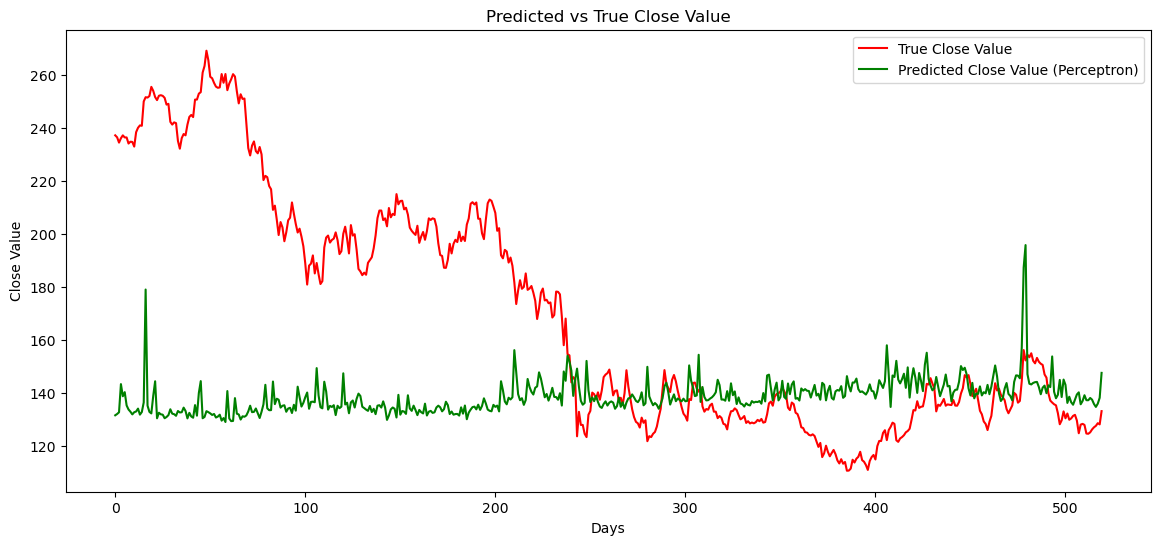

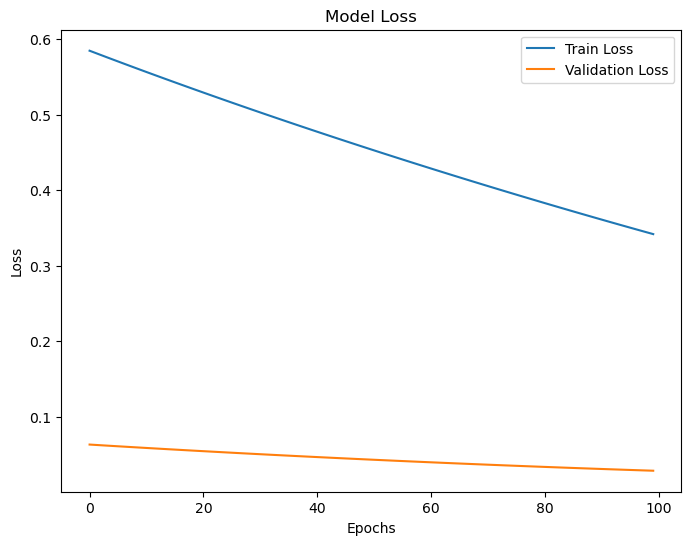

Mean Squared Error (Perceptron): 3193.0236155353737


In [3]:
# PERCEPTRON (NO HIDDEN LAYERS)

print(f"{'~'*15} Building perceptron model {'~'*15}\n")

# Load the dataset
df = pd.read_csv("../backend/Datasets/COALINDIA.csv")

# Feature selection and preprocessing
dropped_features = ['Date', 'Symbol', 'Series', 'Trades',
                    'Turnover', 'Deliverable Volume',
                    '%Deliverble', 'Last', 'VWAP', 'Prev Close']
df.drop(dropped_features, axis=1, inplace=True)

# Define features (X) and target (Y)
X = df.drop('Close', axis=1)
Y = df['Close']

# Scale the data
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()
X = scaler_X.fit_transform(X)
Y = scaler_Y.fit_transform(Y.values.reshape(-1, 1))

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=False)

# Build a neural network model with no hidden layers
# Essentially the same as linear regression since there
# are no hidden layers and no activation function
model = Sequential()
model.add(Dense(1, input_dim=X_train.shape[1], activation=None))

# Compile the model
optimizer = Adam(learning_rate=learning_rate_default)  # Experiment with learning rate
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, Y_test), verbose=2)

# Make predictions
Y_pred = model.predict(X_test)

# Inverse transform the scaled values
Y_test_original = scaler_Y.inverse_transform(Y_test)
Y_pred_original = scaler_Y.inverse_transform(Y_pred)

# Plot the results (True results vs. predicted results)
plot_results(Y_test_original, Y_pred_original, "Perceptron")

# Plot Training vs. Validation Loss
# - When training loss and validation loss converge 
# with each other are both low, that means the model
# is a good fit.
# - Convergence helps ensure that the model is neither
# overfitting nor underfitting. Overfitting occurs when
# the training loss is significantly lower than the validation 
# loss (the model learns the training data too well, including 
# its noise, but fails to generalize). Underfitting happens when 
# both losses are high and the model fails to learn effectively.
# If training loss, is significantly higher than validation loss,
# something wonky is going on and more investigation is needed
# because that is abnormal.
plot_loss(history)

# Calculate MSE
mse = mean_squared_error(Y_test_original, Y_pred_original)
print(f"Mean Squared Error (Perceptron): {mse}")

~~~~~~~~~~~~~~~ Building ANN model with 2 hidden layers ~~~~~~~~~~~~~~~

Epoch 1/100
65/65 - 0s - loss: 0.3462 - val_loss: 0.0382 - 422ms/epoch - 6ms/step
Epoch 2/100
65/65 - 0s - loss: 0.3085 - val_loss: 0.0330 - 63ms/epoch - 964us/step
Epoch 3/100
65/65 - 0s - loss: 0.2769 - val_loss: 0.0284 - 60ms/epoch - 926us/step
Epoch 4/100
65/65 - 0s - loss: 0.2453 - val_loss: 0.0244 - 62ms/epoch - 958us/step
Epoch 5/100
65/65 - 0s - loss: 0.2176 - val_loss: 0.0207 - 61ms/epoch - 932us/step
Epoch 6/100
65/65 - 0s - loss: 0.1933 - val_loss: 0.0175 - 61ms/epoch - 932us/step
Epoch 7/100
65/65 - 0s - loss: 0.1694 - val_loss: 0.0146 - 61ms/epoch - 935us/step
Epoch 8/100
65/65 - 0s - loss: 0.1486 - val_loss: 0.0122 - 61ms/epoch - 932us/step
Epoch 9/100
65/65 - 0s - loss: 0.1297 - val_loss: 0.0100 - 60ms/epoch - 929us/step
Epoch 10/100
65/65 - 0s - loss: 0.1123 - val_loss: 0.0082 - 59ms/epoch - 912us/step
Epoch 11/100
65/65 - 0s - loss: 0.0986 - val_loss: 0.0067 - 59ms/epoch - 909us/step
Epoch 12/100


Epoch 98/100
65/65 - 0s - loss: 0.0031 - val_loss: 0.0026 - 59ms/epoch - 906us/step
Epoch 99/100
65/65 - 0s - loss: 0.0031 - val_loss: 0.0026 - 58ms/epoch - 890us/step
Epoch 100/100
65/65 - 0s - loss: 0.0029 - val_loss: 0.0024 - 58ms/epoch - 889us/step
17/17 [==============================] - 0s 543us/step


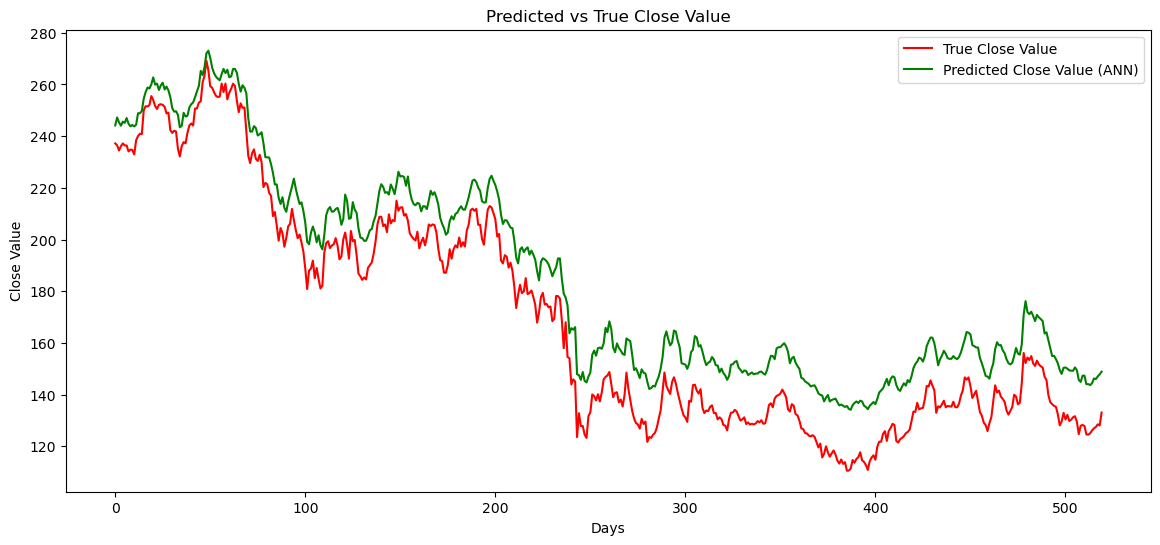

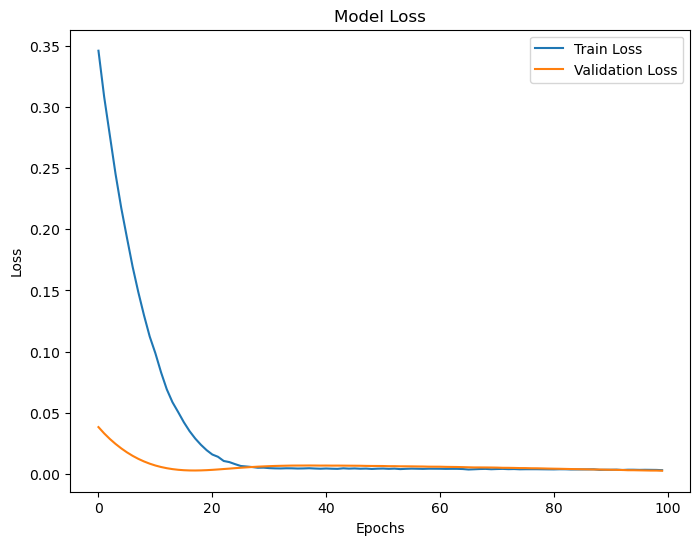

Mean Squared Error (ANN): 269.84854952283854


In [4]:
# ANN model with 2 hidden layers

print(f"{'~'*15} Building ANN model with 2 hidden layers {'~'*15}\n")

# Load the dataset
df = pd.read_csv("../backend/Datasets/COALINDIA.csv")

# Feature selection and preprocessing
dropped_features = ['Date', 'Symbol', 'Series', 
                    'Trades', 'Turnover', 'Deliverable Volume', 
                    '%Deliverble', 'Last', 'VWAP', 'Prev Close']
df.drop(dropped_features, axis=1, inplace=True)

# Define features (X) and target (Y)
X = df.drop('Close', axis=1)
Y = df['Close']

# Scale the data
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()
X = scaler_X.fit_transform(X.values)
Y = scaler_Y.fit_transform(Y.values.reshape(-1, 1))

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=False)

# Build a neural network model with 2 hidden layers
# You can experiment with different architectures, including the number of layers and neurons.
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(1))

# Compile the model
optimizer = Adam(learning_rate=learning_rate_default)  # Experiment with learning rate
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, Y_test), verbose=2)

# Make predictions
Y_pred = model.predict(X_test)

# Inverse transform the scaled values
Y_test_original = scaler_Y.inverse_transform(Y_test)
Y_pred_original = scaler_Y.inverse_transform(Y_pred)

# Plot the results (True results vs. predicted results)
plot_results(Y_test_original, Y_pred_original, "ANN")

# Plot Training vs. Validation Loss
# - When training loss and validation loss converge 
# with each other are both low, that means the model
# is a good fit.
# - Convergence helps ensure that the model is neither
# overfitting nor underfitting. Overfitting occurs when
# the training loss is significantly lower than the validation 
# loss (the model learns the training data too well, including 
# its noise, but fails to generalize). Underfitting happens when 
# both losses are high and the model fails to learn effectively.
plot_loss(history)

# Calculate MSE
mse = mean_squared_error(Y_test_original, Y_pred_original)
print(f"Mean Squared Error (ANN): {mse}")

~~~~~~~~~~~~~~~ Building DNN model with 11 hidden layers~~~~~~~~~~~~~~~

Epoch 1/100
65/65 - 1s - loss: 0.3723 - val_loss: 0.0029 - 1s/epoch - 18ms/step
Epoch 2/100
65/65 - 0s - loss: 0.0715 - val_loss: 0.0133 - 163ms/epoch - 3ms/step
Epoch 3/100
65/65 - 0s - loss: 0.0681 - val_loss: 0.0104 - 175ms/epoch - 3ms/step
Epoch 4/100
65/65 - 0s - loss: 0.0598 - val_loss: 0.0102 - 177ms/epoch - 3ms/step
Epoch 5/100
65/65 - 0s - loss: 0.0570 - val_loss: 0.0077 - 178ms/epoch - 3ms/step
Epoch 6/100
65/65 - 0s - loss: 0.0510 - val_loss: 0.0081 - 178ms/epoch - 3ms/step
Epoch 7/100
65/65 - 0s - loss: 0.0451 - val_loss: 0.0084 - 180ms/epoch - 3ms/step
Epoch 8/100
65/65 - 0s - loss: 0.0432 - val_loss: 0.0067 - 177ms/epoch - 3ms/step
Epoch 9/100
65/65 - 0s - loss: 0.0395 - val_loss: 0.0066 - 178ms/epoch - 3ms/step
Epoch 10/100
65/65 - 0s - loss: 0.0369 - val_loss: 0.0061 - 174ms/epoch - 3ms/step
Epoch 11/100
65/65 - 0s - loss: 0.0364 - val_loss: 0.0064 - 177ms/epoch - 3ms/step
Epoch 12/100
65/65 - 0s -

Epoch 99/100
65/65 - 0s - loss: 0.0046 - val_loss: 8.1002e-04 - 174ms/epoch - 3ms/step
Epoch 100/100
65/65 - 0s - loss: 0.0049 - val_loss: 6.8851e-04 - 174ms/epoch - 3ms/step
17/17 [==============================] - 0s 800us/step


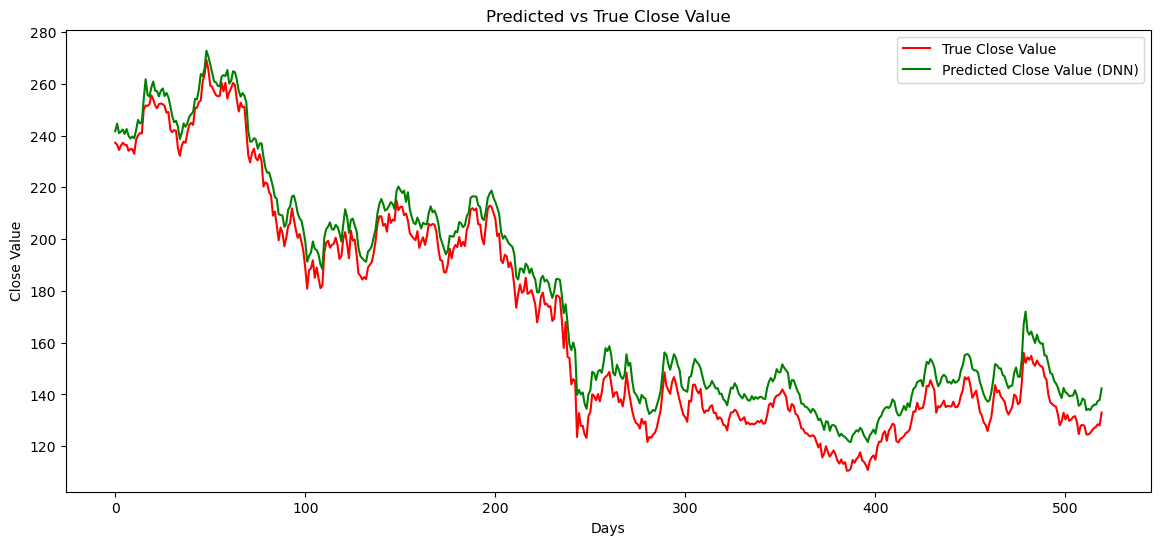

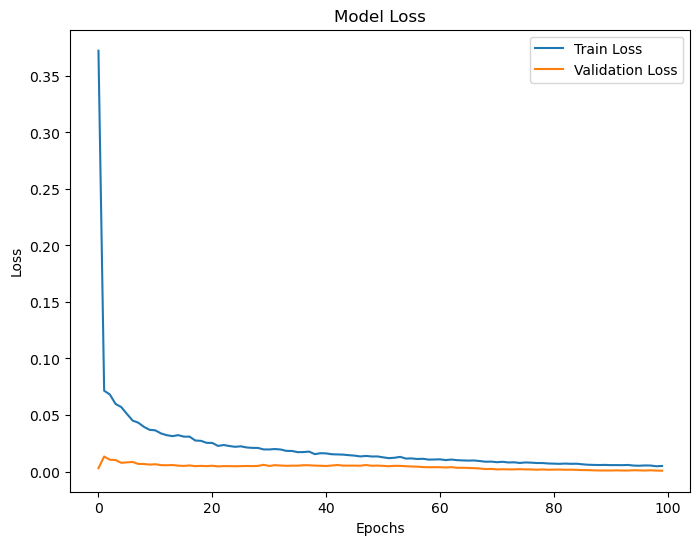

Mean Squared Error (DNN): 76.2791070467483


In [5]:
# DEEP NEURAL NETWORK model

# Initialize number of hidden layers
hidden_layers = 11
print(f"{'~'*15} Building DNN model with {hidden_layers} hidden layers{'~'*15}\n")

# Load the dataset
coalindia_dataset = pd.read_csv("../backend/Datasets/COALINDIA.csv")

# Initialize list of dropped features
dropped_features = ['Date', 'Symbol',
                    'Series', 'Trades', 'Turnover',
                    'Deliverable Volume', '%Deliverble',
                    'Last', 'VWAP', 'Prev Close']
cleaned_coalindia_dataset = coalindia_dataset.drop(dropped_features, axis=1)

# SETTING THE TARGET VARIABLE (Y) AND SELECTING THE FEATURES (X):
X = cleaned_coalindia_dataset.drop('Close', axis=1).values
Y = cleaned_coalindia_dataset['Close'].values.reshape(-1, 1)

# SCALING DATA
scaler_X = MinMaxScaler()
X = scaler_X.fit_transform(X)
scaler_Y = MinMaxScaler()
Y = scaler_Y.fit_transform(Y)

# Creating a Training Set and a Test Set for Stock Market Prediction:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=False)

# Building DNN model with 11 hidden layers
model = Sequential()

# Input layer
# Input layer will have same number of neurons as number of feature variables
model.add(Dense(64, input_dim=X_train.shape[1], activation='tanh'))

# Hidden layers
# Play around with number of neurons in each hidden layer.
# Too many neurons leads to overcomplexity, not enough means too simple
# Tanh activation function here is used b/c it is recommended to use
# when there are more hidden layers.
for _ in range(hidden_layers-1):
    model.add(Dense(128, activation='tanh'))
    model.add(Dropout(0.1)) # This helps with preventing overfitting

# Output layer
# Output layer will have 1 neuron b/c there's only 1 target variable
model.add(Dense(1))

# Changing learning rate here with Adam's optimization.
# Learning rate is static at the moment, but we can explore
# dynamically changing learning rates later.

# Normal learning rate ~ 1e-3 to 1e-4, but here it
# is 1e-5.
optimizer = Adam(learning_rate=learning_rate_default)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train DNN model
# Play around with epochs, batch_size values
history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, Y_test), verbose=2)

# Making a prediction based on DNN model:
Y_pred = model.predict(X_test)

# We gotta inverse_transform below values since
# we scaled them above
Y_test_original = scaler_Y.inverse_transform(Y_test)
Y_pred_original = scaler_Y.inverse_transform(Y_pred)

# Plot the results (True results vs. Predicted results)
plot_results(Y_test_original, Y_pred_original, "DNN")

# Plot Training vs. Validation Loss
# - When training loss and validation loss converge 
# with each other are both low, that means the model
# is a good fit.
# - Convergence helps ensure that the model is neither
# overfitting nor underfitting. Overfitting occurs when
# the training loss is significantly lower than the validation 
# loss (the model learns the training data too well, including 
# its noise, but fails to generalize). Underfitting happens when 
# both losses are high and the model fails to learn effectively.
plot_loss(history)

# Error report
mse = mean_squared_error(Y_test_original, Y_pred_original)
print(f"Mean Squared Error (DNN): {mse}")


In [6]:
import tensorflow as tf
metric = tf.keras.metrics.R2Score()
metric.update_state(Y_test_original, Y_pred_original)
result = metric.result()
result.numpy()

0.9609424

In [7]:
X_train.shape[1]

4